In [1]:

%matplotlib inline


# Demo of 3D bar charts


A basic demo of how to plot 3D bars with and without shading.



# 2 Explanation of different measures

[Picture would be nice]

**Example 2.1.** Consider three countries, each with 100,000 people and an area of $100km^2$, and think about the population of each square kilometre grid square.

1.  *Averagia*  has  a  uniform  spread  of  population,  with  1,000  people  living  in  each  gridsquare.
2.  *Builtupia*  has  ten  towns,  each  of  10,000  people  living  in  a  single  square  kilometre, and the remaining land is uninhabited.
3.  *Citia* has one city, where 100,000 people live in a single square kilometre, and where the remaining land is uninhabited.

In [9]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns

In [3]:

total_pop = 100_000

averagia_people_count = 1_000
builtupia_people_count = 10_000
citia_people_count = 100_000

averagia_town_count = 0
builtupia_town_count = 10
citia_town_count = 1

gridsquare_count = total_pop/averagia_people_count
side_length = int(np.sqrt(gridsquare_count))

In [4]:

# Averagia has a uniform spread of population, with 1,000 people living in each gridsquare.
averagia_data = np.empty([side_length, side_length], dtype=int)
averagia_data.fill(averagia_people_count)
averagia_top = np.array(averagia_data.flat)

In [5]:

# Builtupia has ten towns, each of 10,000 people living in a single square kilometre, and the remaining land is uninhabited.
builtupia_data = np.empty([side_length, side_length], dtype=int)
builtupia_data.fill(0)
for x, y in zip(np.random.choice(side_length, builtupia_town_count), np.random.choice(side_length, builtupia_town_count)):
    builtupia_data[x, y] = builtupia_people_count
builtupia_top = np.array(builtupia_data.flat)

In [6]:

# Citia has one city, where 100,000 people live in a single square kilometre, and where the remaining land is uninhabited.
citia_data = np.empty([side_length, side_length], dtype=int)
citia_data.fill(0)
for x, y in zip(np.random.choice(side_length, citia_town_count), np.random.choice(side_length, citia_town_count)):
    citia_data[x, y] = citia_people_count
citia_top = np.array(citia_data.flat)

In [7]:

# Uniform inputs to bar chart
_x = np.arange(10)
_y = np.arange(10)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

bottom = np.zeros_like(np.array(averagia_data.flat))
width = depth = 1

In [43]:

%run ../../load_magic/storage.py
s = Storage()
averagia_data = np.rot90(np.fliplr(s.load_object('averagia_data')), k=0)
averagia_top = np.array(averagia_data.flat)
bottom = np.zeros_like(np.array(averagia_data.flat))
builtupia_data = np.rot90(np.fliplr(s.load_object('builtupia_data')), k=0)
builtupia_top = np.array(builtupia_data.flat)
citia_data = np.rot90(np.fliplr(s.load_object('citia_data')), k=0)
citia_top = np.array(citia_data.flat)

<Figure size 432x288 with 0 Axes>

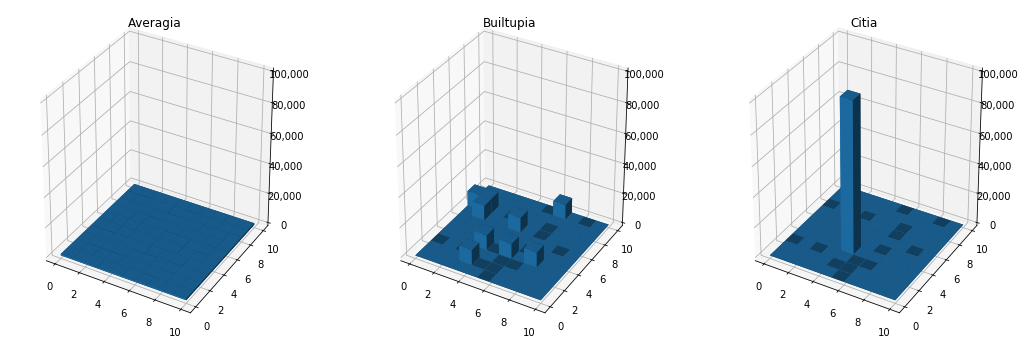

In [45]:

from matplotlib.ticker import FormatStrFormatter, FuncFormatter

# Setup the figure and axes
#suptitle_str = '$Example 2.1.$ Consider three countries, each with 100,000 people and an area of $100km^2$,\n'
#suptitle_str += 'and think about the population of each square kilometre grid square.'
fig = plt.figure(figsize=(18, 18/3))
#fig.suptitle(suptitle_str)
ax_averagia = fig.add_subplot(131, projection='3d')
ax_builtupia = fig.add_subplot(132, projection='3d')
ax_citia = fig.add_subplot(133, projection='3d')

Poly3DCollection_obj = ax_averagia.bar3d(x, y, bottom, width, depth, averagia_top, shade=True)
Text_tuple = ax_averagia.set_title('Averagia')
zlim_tuple = ax_averagia.set_zlim(0, total_pop)
ax_averagia.zaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))

Poly3DCollection_obj = ax_builtupia.bar3d(x, y, bottom, width, depth, builtupia_top, shade=True)
Text_tuple = ax_builtupia.set_title('Builtupia')
zlim_tuple = ax_builtupia.set_zlim(0, total_pop)
ax_builtupia.zaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))

Poly3DCollection_obj = ax_citia.bar3d(x, y, bottom, width, depth, citia_top, shade=True)
Text_tuple = ax_citia.set_title('Citia')
zlim_tuple = ax_citia.set_zlim(0, total_pop)
ax_citia.zaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))

pgf_dir = os.path.join(s.saves_folder, 'pgf')
os.makedirs(name=pgf_dir, exist_ok=True)
fig.savefig(os.path.join(pgf_dir, 'example_2_1_3d_bar_chart.pgf'))


----